<a href="https://colab.research.google.com/github/AbduallahGamal/CNN5ModelsPractical/blob/main/CNNTheoreticalPlusPractical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# LeNet-5 Architecture

from keras import models, layers
import keras

class LeNet(models.Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=input_shape, padding='same'))
    self.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
    self.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
    self.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
    self.add(layers.Flatten())
    self.add(layers.Dense(84, activation='tanh'))
    self.add(layers.Dense(nb_classes, activation='softmax'))

    self.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')
    self.summary()

In [6]:
# AlexNet Architecture

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPool2D, Dropout, Flatten, Conv2D
from keras.layers.normalization import batch_normalization
import numpy as np
np.random.seed(1000)

# Instantiate an empty model 
model = Sequential()

# 1st Convoltuional layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convoltuional layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convoltuional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convoltuional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convoltuional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected Layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 384)         8

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 128)       0   

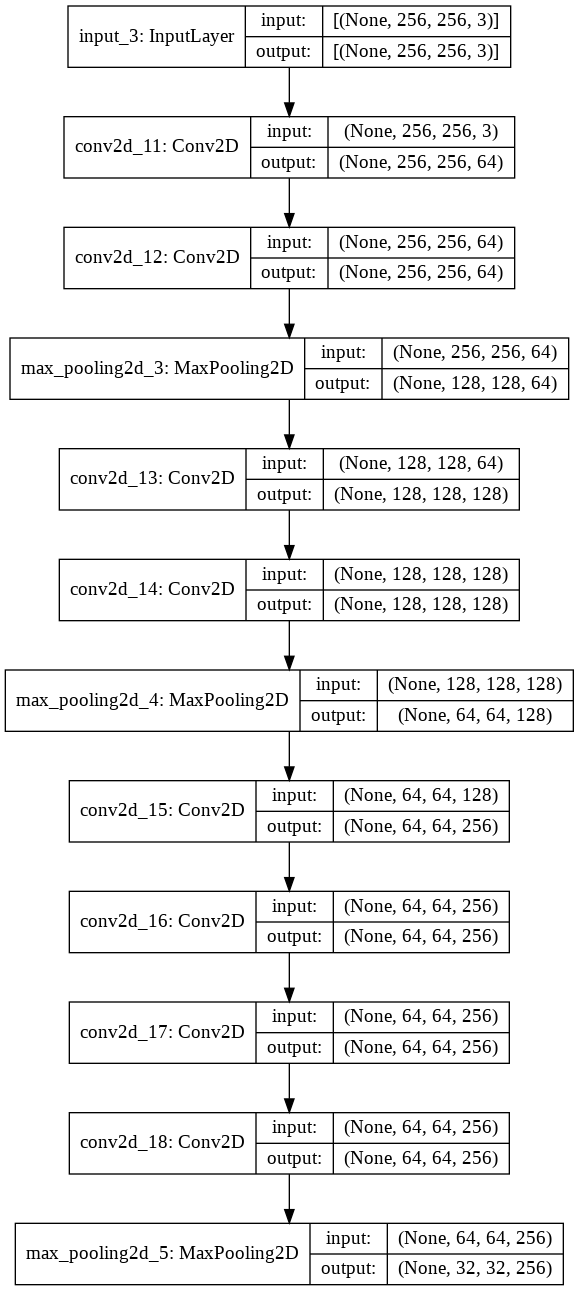

In [7]:
# VGG (Visual Geomtry Group) Architecture
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model

# A function for creating a VGG block
def vgg_block(layer_in, n_filters, n_conv):
  # add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
  # Add max pooling layer 
  layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in

# define model input
visible = Input(shape=(256,256,3))
# Add VGG module
layer = vgg_block(visible, 64, 2)
# Add VGG module
layer = vgg_block(layer, 128, 2)
# Add VGG module
layer = vgg_block(layer, 256, 4)

# create model
model = Model(inputs=visible, outputs=layer)

# summarize model
model.summary()

# plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 64) 256         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 128 3584        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 32) 2432        input_4[0][0]                    
____________________________________________________________________________________________

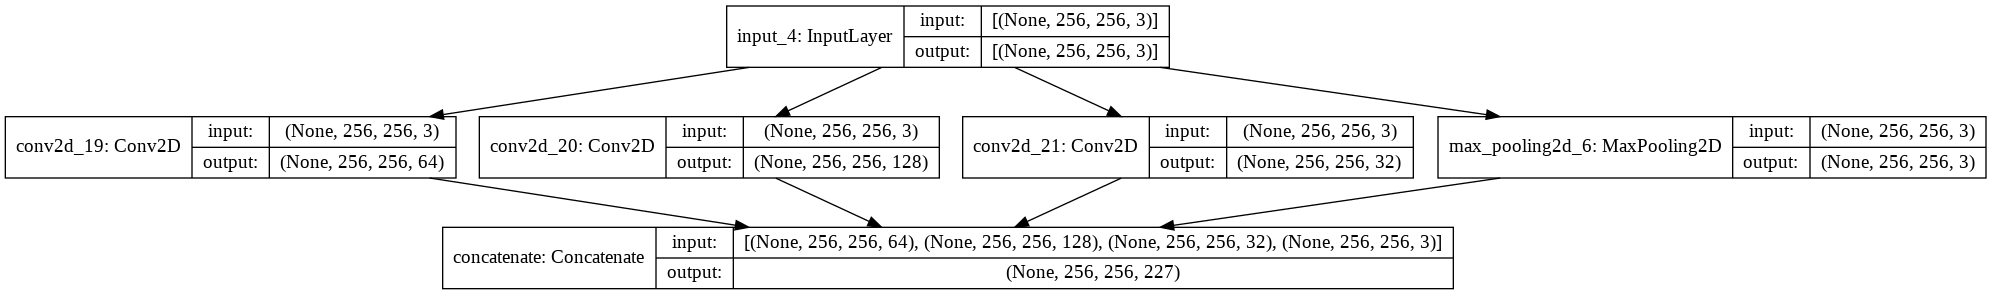

In [8]:
# Inception Architecture
# Example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
  # 1*1 convolutional
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3*3 convolutional
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
  # 5*5 convolutional
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)

  # 3*3 max pooling
  pool = MaxPooling2D((3,3),strides=(1,1), padding='same')(layer_in)

  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out

# define model input 
visible = Input(shape=(256,256,3))
# add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 256, 256, 96) 384         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 16) 64          input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 256, 256, 3)  0           input_5[0][0]                    
____________________________________________________________________________________________

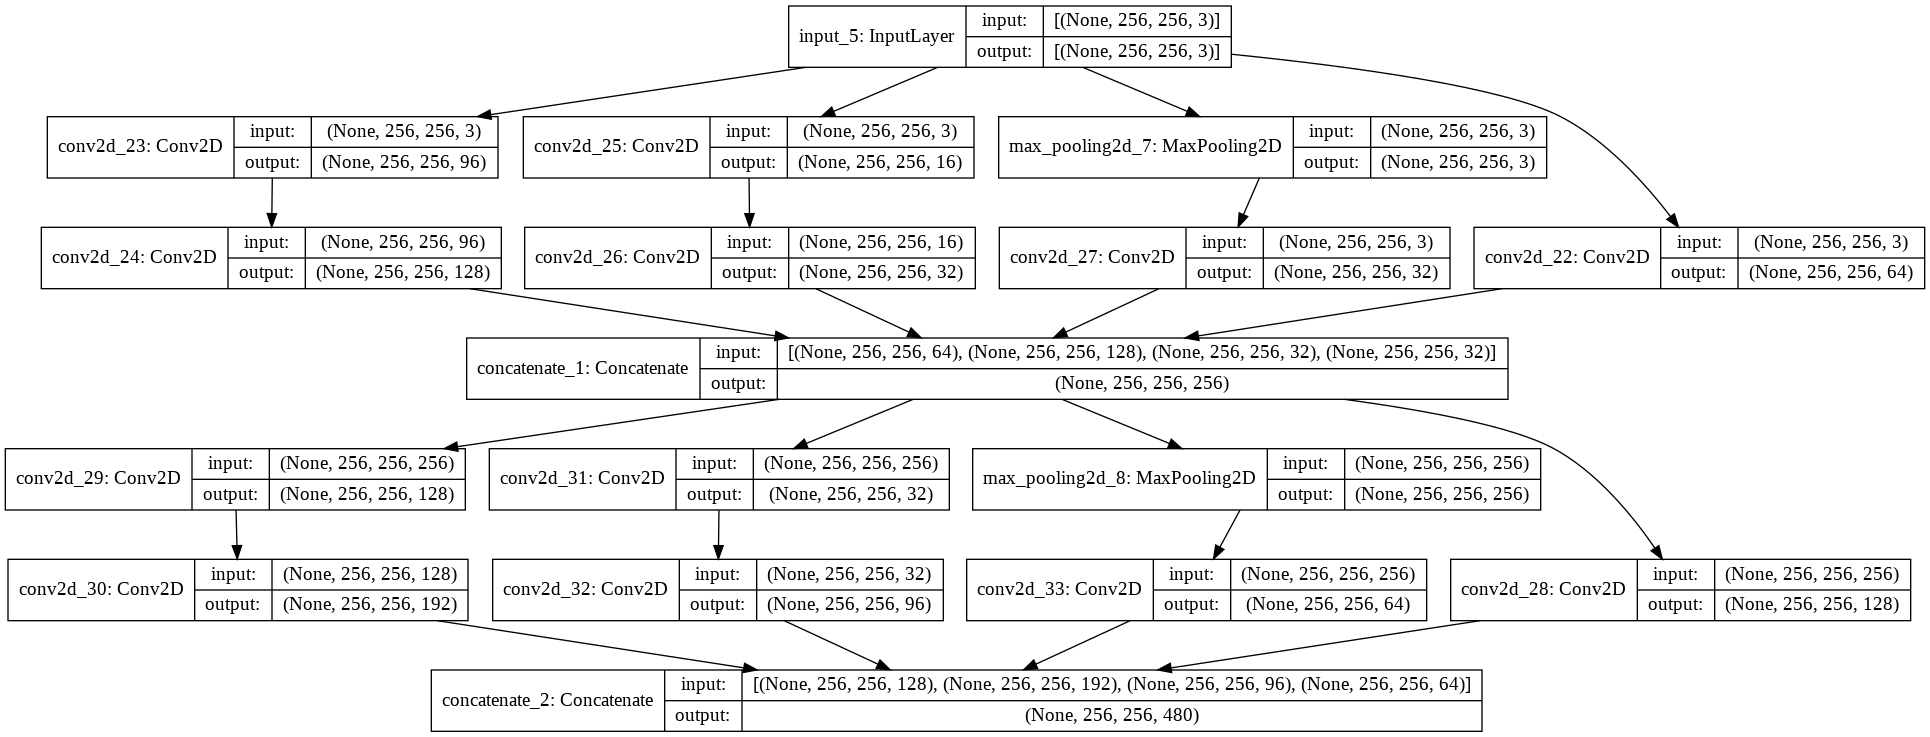

In [9]:
# Inception Architecture More updated
# Example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils.vis_utils import plot_model

# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1*1 convolutional
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3*3 convolutional
  conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
  # 5*5 convolutional
  conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)

  # 3*3 max pooling
  pool = MaxPooling2D((3,3),strides=(1,1), padding='same')(layer_in)
  pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)

  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out

# define model input 
visible = Input(shape=(256,256,3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 256, 256, 64) 1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_35[0][0]                  
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 256, 256, 64) 256         input_6[0][0]                    
____________________________________________________________________________________________

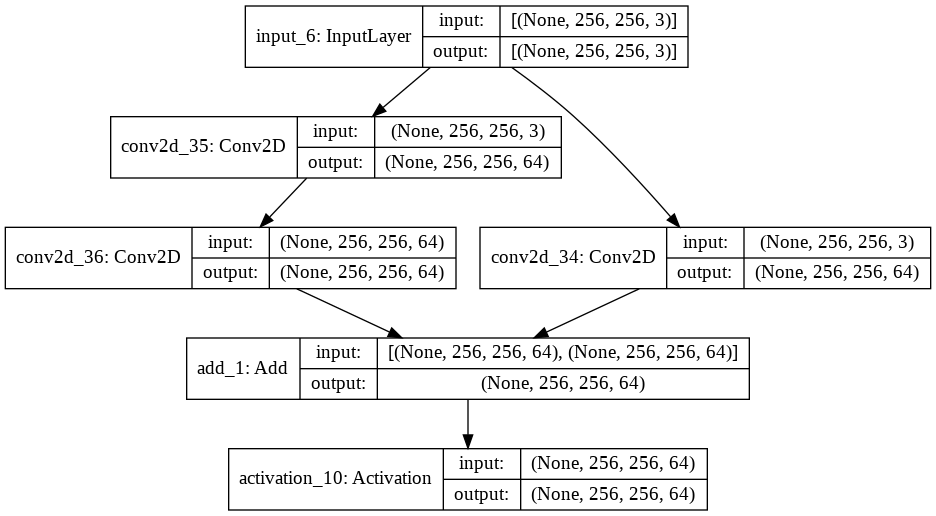

In [10]:
# ResNet (Residual Network block) Architecture
# Example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils.vis_utils import plot_model

# function fro creating an identity or projection residual module
def residual_module(layer_in, n_filters):
  merge_input = layer_in
  # Check if number of filters needs to be increase, assume channels last format
  if layer_in.shape[-1] != n_filters:
    merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # Conv1
  conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # Conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
  # Add filters, assume filters/channels last
  layer_out = add([conv2, merge_input])
  # activation function
  layer_out = Activation('relu')(layer_out)
  return layer_out

# define model input
visible = Input(shape=(256, 256, 3))
# add Vgg module
layer = residual_module(visible, 64)
# create model 
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')